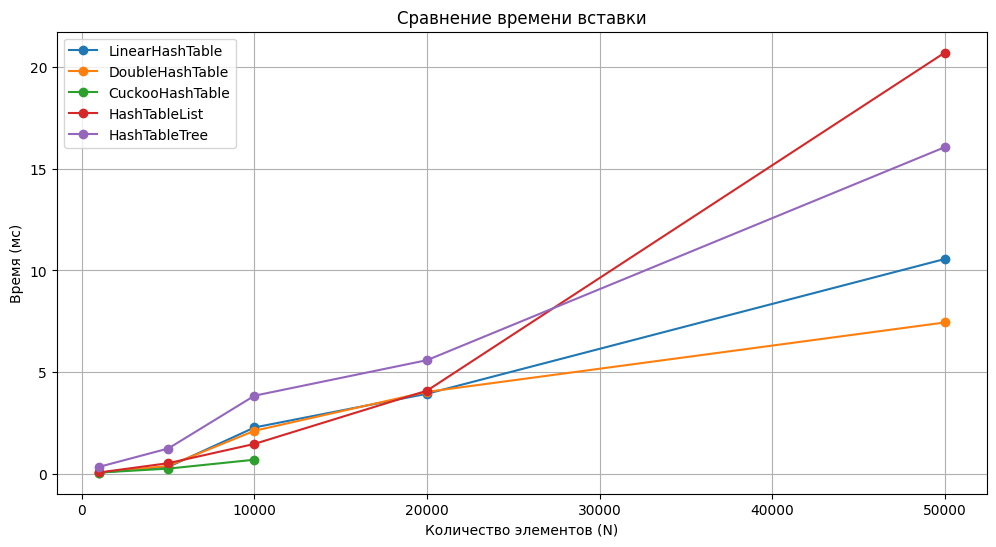

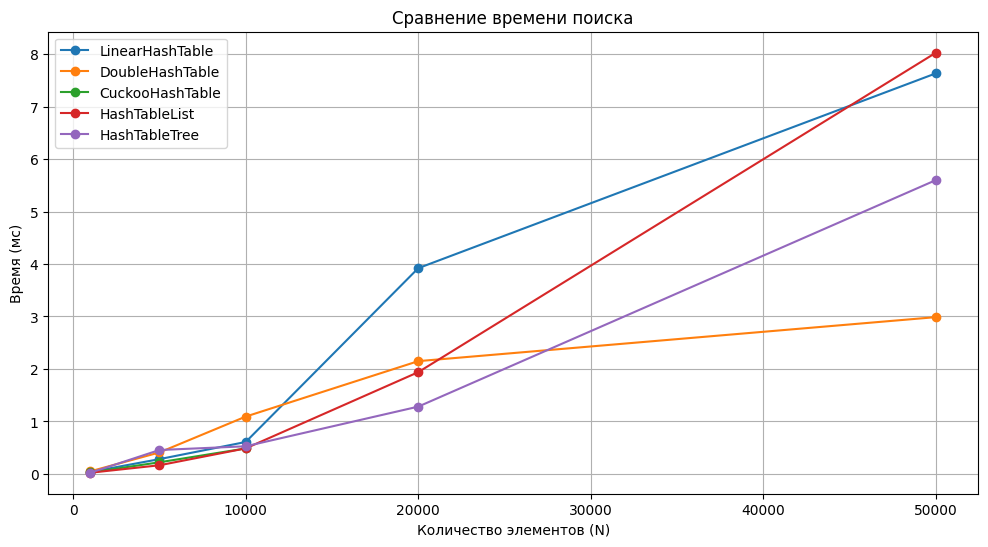

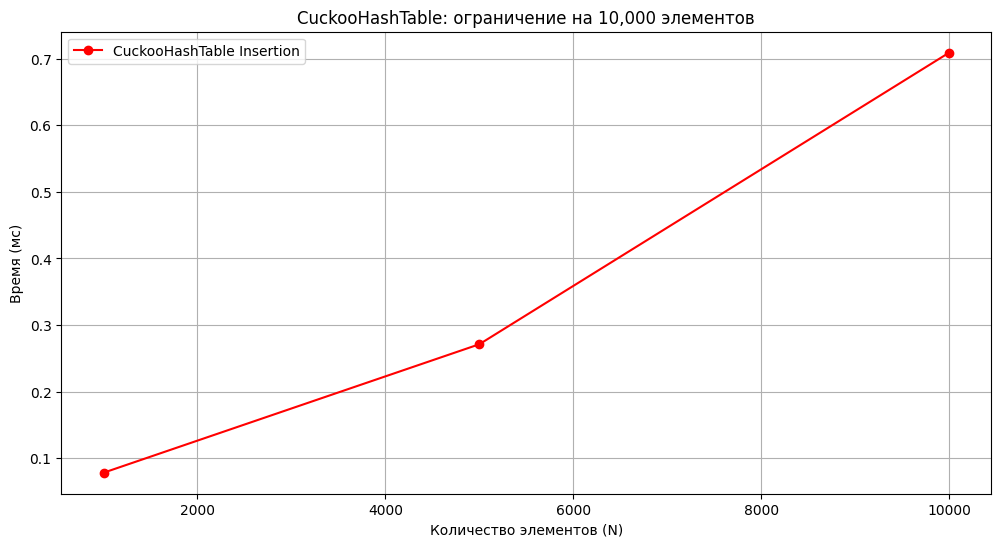

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Создаем DataFrame с результатами
data = {
    "N": [1000, 5000, 10000, 20000, 50000],
    "LinearHashTable_Insertion": [0.074, 0.353, 2.292, 3.947, 10.560],
    "DoubleHashTable_Insertion": [0.070, 0.405, 2.129, 4.040, 7.446],
    "CuckooHashTable_Insertion": [0.078, 0.271, 0.709, None, None],
    "HashTableList_Insertion": [0.083, 0.538, 1.484, 4.098, 20.689],
    "HashTableTree_Insertion": [0.359, 1.258, 3.851, 5.596, 16.049],
    "LinearHashTable_Search": [0.038, 0.281, 0.608, 3.921, 7.635],
    "DoubleHashTable_Search": [0.049, 0.409, 1.092, 2.149, 2.988],
    "CuckooHashTable_Search": [0.027, 0.221, 0.485, None, None],
    "HashTableList_Search": [0.022, 0.164, 0.486, 1.939, 8.028],
    "HashTableTree_Search": [0.023, 0.455, 0.526, 1.282, 5.600],
}

df = pd.DataFrame(data)

# Построение графиков вставки
plt.figure(figsize=(12, 6))
for col in ["LinearHashTable_Insertion", "DoubleHashTable_Insertion", 
            "CuckooHashTable_Insertion", "HashTableList_Insertion", "HashTableTree_Insertion"]:
    plt.plot(df["N"], df[col], marker="o", label=col.replace("_Insertion", ""))
plt.xlabel("Количество элементов (N)")
plt.ylabel("Время (мс)")
plt.title("Сравнение времени вставки")
plt.legend()
plt.grid()
plt.show()

# Построение графиков поиска
plt.figure(figsize=(12, 6))
for col in ["LinearHashTable_Search", "DoubleHashTable_Search", 
            "CuckooHashTable_Search", "HashTableList_Search", "HashTableTree_Search"]:
    plt.plot(df["N"], df[col], marker="o", label=col.replace("_Search", ""))
plt.xlabel("Количество элементов (N)")
plt.ylabel("Время (мс)")
plt.title("Сравнение времени поиска")
plt.legend()
plt.grid()
plt.show()

# Подчеркнуть невозможность вставки в CuckooHashTable после 10000 элементов
plt.figure(figsize=(12, 6))
plt.plot(df["N"], df["CuckooHashTable_Insertion"], marker="o", label="CuckooHashTable Insertion", color="red")
plt.xlabel("Количество элементов (N)")
plt.ylabel("Время (мс)")
plt.title("CuckooHashTable: ограничение на 10,000 элементов")
plt.legend()
plt.grid()
plt.show()
